# Вычисление производной сложной вектор функции
Будем вычислять производную функции $f(X,W) = \sigma(\nu(X,W))$, где $\nu$ - операция скалярного произведения. $X$ - вектор строка входных параметров, $W$ - столбец весов.

### Импортируем библиотеки

In [382]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable

### Опишем рассматриваемую функцию

In [383]:
def sigmoid(x: np.ndarray):
    return 1/(1+np.exp(-x))
def func(X: np.ndarray,W: np.ndarray):
    N = np.dot(X,W)
    return sigmoid(N)

### Вычисление производной

Найдем частную производную по $X$: $$\frac{\partial f}{\partial X} = \frac{\partial \sigma}{\partial u}(\nu(X,W)) \cdot \frac{\partial \nu}{\partial X}(X,W)$$

$\nu$ - обычная функция скалярного произведения: $\nu(X,W) = x_1 w_1 + x_2 w_2 + ... + x_n w_n$. Тогда $$w_j = \frac{\partial \nu}{\partial x_j}$$

Таким образом $$\frac{\partial \nu}{\partial X} = W^T = [w_1,w_2, ... , w_n]$$

Производная же $\frac{\partial \sigma}{\partial u}(\nu(X,W))$ - обычное число. И аргумент функции $\sigma$ - $x_1 w_1 + x_2 w_2 + ... + x_n w_n$ - число. 

Теперь понятен алгоритм решения данной задачи:
1) Пишем функцию для приближенного вычисления производной **числовой** функции.
2) Умножаем результат вычисления производной $\frac{\partial \sigma}{\partial u}$ в заданной точке на строку $W^T$



#### Код приближенного вычисления производной в заданной точке

In [384]:
def derivative(func: Callable[[np.ndarray],np.ndarray],
               points: np.ndarray,
               delta: float= np.power(1/10,6)) -> np.ndarray:
    return (func(points+delta)-func(points-delta))/(2*delta)

### Итоговая функция

In [385]:
def funcDeriv(X: np.ndarray,W: np.ndarray):
    #вычисление производной при заданных X и W, в заданных точках points
    #производная сигмоиды в заданной точке
    dSbydU = derivative(sigmoid,np.dot(X,W))
    #результат - произведение вычисленного числа на строку
    return (W.T)*dSbydU

### Проверка результата

Построим график $f$, как функции от одной переменной. Для этого оставим <<свободной>> одну из переменных, а остальные зафиксируем.

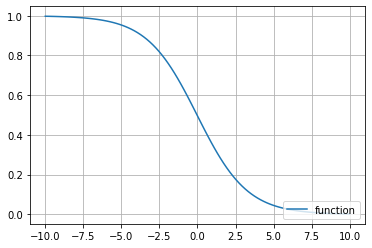

In [386]:
X = (np.random.random(3)-0.5)*5
W = (np.random.random(3).T-0.5)*5

# Зафиксируем все значения, кроме x_3. Построим график заданной функции как график зависимости от одной перемнной
xAxes = np.linspace(-10,10,100)
y = [func([X[0],X[1],x],W) for x in xAxes]


fig,ax = plt.subplots()
plt.plot(xAxes,y,label = 'function')
ax.legend(loc = 'lower right')
plt.grid()
plt.show()

По определению дифференцируемости функции: $$\Delta f(X^{(0)}) \sim \sum_{i=1}^{n} \frac{\partial f}{\partial x_i}(x^{(0)}) \cdot \Delta x^{(0)}$$

В нашем случае не равно нулю только $\Delta x_3$. Попробуем умножить изменение $X$ на полученное значение градиента. Проверим, совпадает ли результат(в пределах погрешности) с изменением функции

In [387]:
maxStartPoint = 7 #положение начальной точки будет в диапазоне (-maxStartPoint,maxStartPoint)
startPoint = (0.5-np.random.random())*maxStartPoint #начальная точка для x3
deltaX = 0.05 #изменение аргмуента x3

yDeriv = funcDeriv([X[0],X[1],startPoint],W)
deltaF = func([X[0],X[1],startPoint+deltaX],W)-func([X[0],X[1],startPoint],W)
print(yDeriv[2]*deltaX)
print(deltaF)

-0.005661469038891952
-0.005618011251676158


Как видим, значения совпали(в пределах погрешности). Попробуем изобразить это на графике

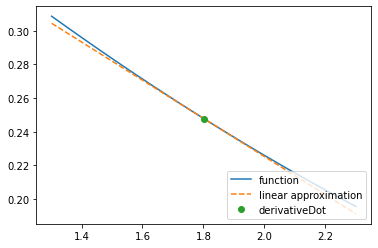

In [389]:
xAxes = np.linspace(startPoint-10*deltaX,startPoint+10*deltaX,100)
y = [func([X[0],X[1],x],W) for x in xAxes]
approx =  func([X[0],X[1],startPoint],W)+yDeriv[2]*(xAxes-startPoint)

fig,ax = plt.subplots()
plt.plot(xAxes,y,label = 'function')
plt.plot(xAxes,approx,'--',label = 'linear approximation')
plt.plot([startPoint],[func([X[0],X[1],startPoint],W)],'o',label = 'derivativeDot')
ax.legend(loc = 'lower right')
plt.show()